# **Perceptrón multicapa**

AKA redes neuronales artificiales.

In [96]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

from sklearn.neighbors import KNeighborsClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

from IPython.core.pylabtools import figsize;

import tensorflow as tf;
from tensorflow import keras;


## Lectura del dataset

In [97]:
# DATASET MNIST
mnist = keras.datasets.mnist;
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data();
class_names=["cero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"];

In [98]:
X_train_full.dtype

dtype('uint8')

In [99]:
# Conjuntos de entrenamiento y testeo
# esto se llama normalizar, no se hace siempre, te da valores entre 0 y 1
X_valid, X_train=X_train_full[:5_0000]/255.0,X_train_full[:5_0000]/255.0
y_valid, y_train=y_train_full[:5_0000],y_train_full[:5_0000]

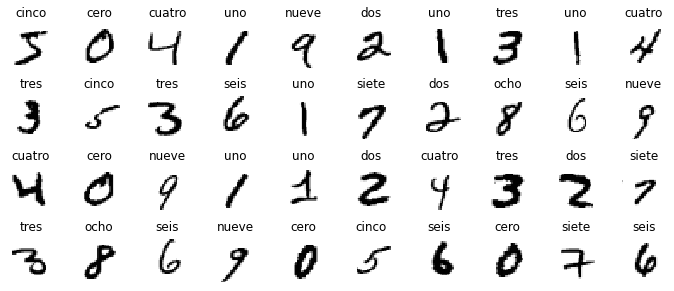

In [100]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Entrenamiento y evaluación de un clasificador

### Usando un **KNeighborsClassifier**

In [101]:
# el conjunto de entrenamiento tiene una 'forma' que no nos es útil
X_train.shape

(50000, 28, 28)

In [102]:
# Reshape de X_train e X_test de (55000, 28, 28, 1) -> (55000, 28*28)
X_train_rs=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
y_train_rs=y_train.copy()

X_test_rs=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
y_test_rs=y_test.copy()

In [103]:
# KNeighborsClassifier para crear un clasificador
knn_clf=KNeighborsClassifier(weights="distance",n_neighbors=8)
knn_clf.fit(X_train_rs, y_train_rs)

# evaluarlo con el conjunto de testeo
y_test_rs_pred=knn_clf.predict(X_test_rs)

# mostrar la matriz de confusión
cm=confusion_matrix(y_test_rs, y_test_rs_pred)
cm

array([[ 978,    0,    0,    0,    0,    0,    0,    0,    2,    0],
       [  20, 1032,    5,    4,    0,    0,    3,    1,   70,    0],
       [ 157,    0,  825,   10,    0,    0,    0,    1,   39,    0],
       [ 147,    0,    2,  709,    0,    0,    0,    1,  150,    1],
       [ 236,    0,    0,    0,  566,    0,    4,    1,  112,   63],
       [ 220,    0,    0,   21,    0,  396,   10,    0,  243,    2],
       [ 127,    0,    0,    1,    0,    0,  806,    0,   24,    0],
       [  65,    0,   22,    3,    3,    0,    0,  768,  120,   47],
       [  76,    0,    0,    1,    0,    0,    1,    0,  896,    0],
       [ 120,    0,    0,    1,    0,    0,    0,    1,  204,  683]])

Precisión: 	 [0.46 1.   0.97 0.95 0.99 1.   0.98 0.99 0.48 0.86] 0.8673282339444208
Recall: 	 [1.   0.91 0.8  0.7  0.58 0.44 0.84 0.75 0.92 0.68] 0.7614173544407408
F1: 		 [0.63 0.95 0.87 0.81 0.73 0.61 0.9  0.85 0.63 0.76] 0.7750066027991984


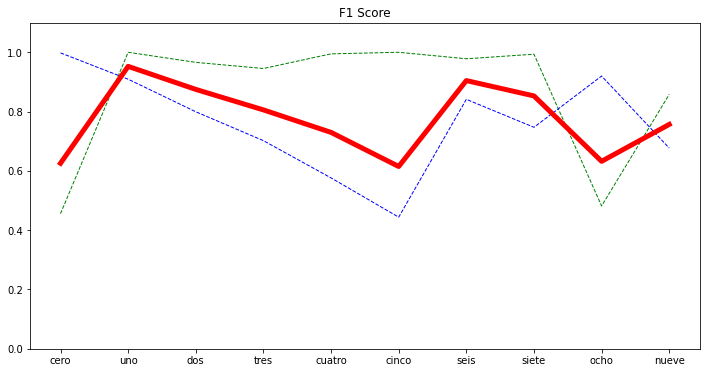

In [104]:
# Calcular la precisión, la sensibilidad y la métrica F1
precision=precision_score(y_test_rs, y_test_rs_pred, average=None)
recall=recall_score(y_test_rs, y_test_rs_pred, average=None)
f1=f1_score(y_test_rs, y_test_rs_pred, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

### Unsado un **RandomForestClassifier**

In [105]:
# RandomForestClassifier para crear un clasificador
fst_clf=RandomForestClassifier(n_estimators=100)
fst_clf.fit(X_train_rs, y_train_rs)

# evaluarlo con el conjunto de testeo
y_test_rs_pred=fst_clf.predict(X_test_rs)

# mostrar la matriz de confusión
cm=confusion_matrix(y_test_rs, y_test_rs_pred)
cm

array([[ 974,    0,    0,    0,    0,    0,    1,    1,    4,    0],
       [   1, 1118,    2,    5,    0,    2,    2,    0,    5,    0],
       [   7,    1,  998,    5,    1,    1,    1,    7,   11,    0],
       [   1,    1,   11,  964,    0,    8,    1,    8,   12,    4],
       [   0,    1,    0,    0,  940,    0,    8,    0,    9,   24],
       [   4,    1,    0,   28,    4,  835,    8,    1,    8,    3],
       [   6,    3,    0,    0,    2,    3,  939,    0,    5,    0],
       [   1,    4,   25,    3,    1,    0,    0,  974,    5,   15],
       [   7,    0,    2,    9,    4,    4,    6,    4,  933,    5],
       [  10,    5,    0,   11,    5,    3,    1,    5,   19,  950]])

Precisión: 	 [0.96 0.99 0.96 0.94 0.98 0.98 0.97 0.97 0.92 0.95] 0.962589290920846
Recall: 	 [0.99 0.99 0.97 0.95 0.96 0.94 0.98 0.95 0.96 0.94] 0.9620807723346883
F1: 		 [0.98 0.99 0.96 0.95 0.97 0.96 0.98 0.96 0.94 0.95] 0.9621940528064865


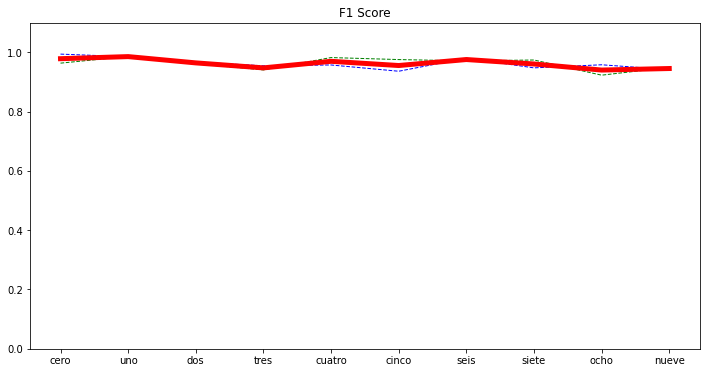

In [106]:
# Calcular la precisión, la sensibilidad y la métrica F1
precision=precision_score(y_test_rs, y_test_rs_pred, average=None)
recall=recall_score(y_test_rs, y_test_rs_pred, average=None)
f1=f1_score(y_test_rs, y_test_rs_pred, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

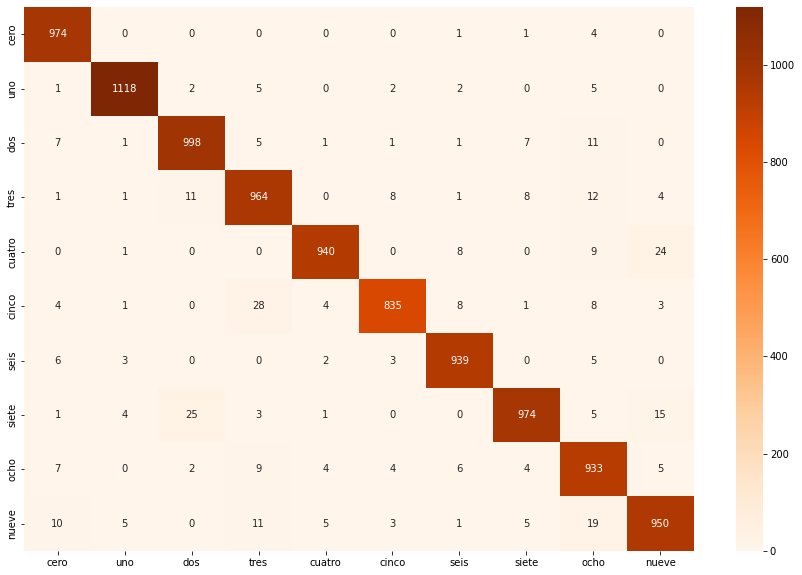

In [107]:
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

## Entrenamiento y evaluación de un MLP

### Creación del modelo

In [108]:
from keras.api._v2.keras import activations
# Creamos el modelo Keras
def define_model():
    model=keras.models.Sequential() # keras tiene varios modelos, este es el que más usaremos
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    model.add(keras.layers.Dense(300,activation="relu"))
    model.add(keras.layers.Dense(100,activation="relu"))
    model.add(keras.layers.Dense(10,activation="softmax")) # diez salidas cuyo valor es la probabilidad de que sea el número correcto
    return model;

model = define_model();

In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               235500    
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Compilación del modelo

In [110]:
# Definimos el optimizador y compilamos el modelo
opt=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Entrenamiento del modelo

In [111]:
# Entrenamos el modelo durante 10 épocas (epochs)
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=True)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2871 - accuracy: 0.9153 - val_loss: 20.5329 - val_accuracy: 0.9545
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1160 - accuracy: 0.9653 - val_loss: 14.4253 - val_accuracy: 0.9677
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0777 - accuracy: 0.9763 - val_loss: 12.8205 - val_accuracy: 0.9713
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0564 - accuracy: 0.9832 - val_loss: 12.4560 - val_accuracy: 0.9723
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 12.1752 - val_accuracy: 0.9758
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 12.1817 - val_accuracy: 0.9781
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0231 - accuracy: 0.9933 - val_loss: 11.8259 -

### Gráfico de precisión y pérdida del modelo durante su entrenamientp

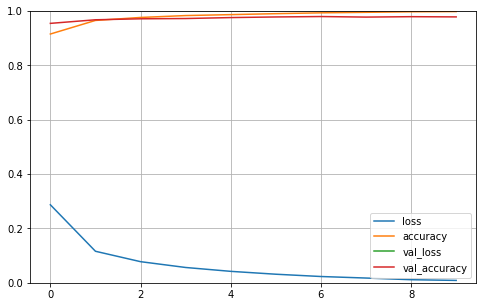

In [112]:
pd.DataFrame(history.history).plot(figsize=(8,5));
plt.grid(True);
plt.gca().set_ylim(0,1);
plt.show();

### Evaluación del modelo con el conjunto de prueba

In [113]:
# Evaluamos el modelo con el conjunto de testeo
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 14.3022 - accuracy: 0.9783


[14.30217456817627, 0.9782999753952026]

In [114]:
# Hacemos una predicción de prueba
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 88ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [115]:
# Calculamos la matriz de confusión
y_test_pred=model.predict(X_test)

cm=confusion_matrix(y_test, y_test_pred.argmax(axis=1))
cm

313/313 [==============================] - 1s 3ms/step


array([[ 971,    0,    1,    1,    1,    0,    1,    0,    2,    3],
       [   0, 1127,    0,    3,    0,    2,    1,    1,    1,    0],
       [   3,    2, 1004,    7,    2,    0,    1,    6,    7,    0],
       [   0,    1,    2,  994,    0,    3,    0,    5,    2,    3],
       [   3,    1,    2,    0,  955,    0,    3,    7,    2,    9],
       [   3,    0,    0,   13,    0,  864,    4,    1,    7,    0],
       [   5,    3,    2,    1,    5,    1,  938,    1,    2,    0],
       [   0,    8,    4,    2,    0,    0,    0, 1011,    2,    1],
       [   5,    0,    2,    7,    0,    1,    1,    5,  953,    0],
       [   2,    5,    0,    7,    7,    1,    3,   13,    5,  966]])

Precisión: 	 [0.98 0.98 0.99 0.96 0.98 0.99 0.99 0.96 0.97 0.98] 0.9785698564852737
Recall: 	 [0.99 0.99 0.97 0.98 0.97 0.97 0.98 0.98 0.98 0.96] 0.9780318639813073
F1: 		 [0.98 0.99 0.98 0.97 0.98 0.98 0.98 0.97 0.97 0.97] 0.9782266218422035


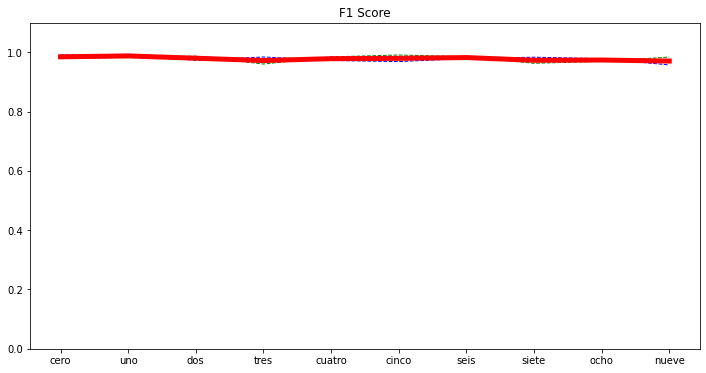

In [116]:
precision = precision_score(y_test, y_test_pred.argmax(axis=1), average=None);
recall    = recall_score(y_test, y_test_pred.argmax(axis=1), average=None);
f1        = f1_score(y_test, y_test_pred.argmax(axis=1), average=None);

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

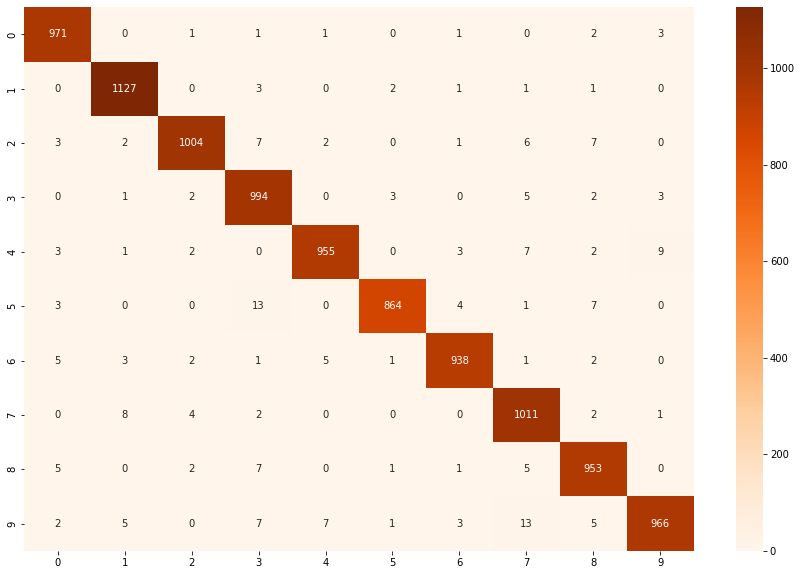

In [117]:
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax);
plt.show();